## Downloads & imports

In [ ]:
!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.8 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801356 sha256=9b60754e006575f8280ee8a405f27db3da20ff5da597dccbfb33e9b596c449f0
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


In [ ]:
import whisper
import string
import pandas as pd

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Model (Whisper)

In [ ]:
w_model = whisper.load_model("large")

100%|█████████████████████████████████████| 2.88G/2.88G [01:47<00:00, 28.6MiB/s]


## Samples

In [ ]:
transcription_short = w_model.transcribe("1.wav")["text"].lower()
transcription_short

' так, я записываю на диктофоне какое-то голосовое, чтобы потом его отправить на тест. в принципе все, будем сейчас тестировать, думаю секунд 20 хватит, да на остальном в принципе можно и закончить. сейчас только дождусь 18, 19, 20, все пауза, где я, готово.'

In [ ]:
transcription_short = transcription_short.translate(str.maketrans('', '', string.punctuation))
transcription_short = "".join([ch for ch in transcription_short if ch not in string.digits])
transcription_short = " ".join(transcription_short.split())
transcription_short = " " + transcription_short + " "
transcription_short

' так я записываю на диктофоне какоето голосовое чтобы потом его отправить на тест в принципе все будем сейчас тестировать думаю секунд хватит да на остальном в принципе можно и закончить сейчас только дождусь все пауза где я готово '

In [ ]:
transcription_long = w_model.transcribe("long_rus.wav")["text"].lower()
transcription_long = transcription_long.translate(str.maketrans('', '', string.punctuation))
transcription_long = "".join([ch for ch in transcription_long if ch not in string.digits])
transcription_long = " ".join(transcription_long.split())
transcription_long = " " + transcription_long + " "
transcription_long[:400]

' значит попытка номер два записать нормальное аудио для прогона через мой скрипт на питоне постараюсь исключить ошибки прошлого и просто говорить говорить нефильтрованные вещи вещи так значит начнем буду рассказывать как в прошлый раз про год буду говорить все что вспоминаю в пределах разрешенных законов вещей так поехали января встретил новый год в люберцах съемной квартире вместе с соседями веге'

## Two words occurences

In [ ]:
def count_occurences(transcription, min_len=5):
    pairs = dict()
    words = transcription.split()
    for i in range(len(words) - 1):
        phrase = words[i] + ' ' + words[i + 1]
        if len(phrase) > min_len:
            if phrase not in pairs:
                pairs[phrase] = 0
            pairs[phrase] += 1
    phrase_dic = list(pairs.items())
    phrases = sorted(phrase_dic, key=lambda x: -x[1])
    print(len(phrases))
    print(phrases[:10])
    return phrases

In [ ]:
word_count_multiplier = 0.1
occurence_percentage = 0.0001

In [ ]:
def find_worst_phrases(phrases, num_words, word_count_multiplier=word_count_multiplier, occurence_percentage=occurence_percentage):
    max_repeats = phrases[0][1]
    diff = round(max_repeats * word_count_multiplier)
    worst_word_pairs = dict()
    for word_pair, cnt in phrases:
        if cnt >= max_repeats - diff and cnt / num_words >= occurence_percentage:
            worst_word_pairs[word_pair] = cnt
    return worst_word_pairs

### Short sample

In [ ]:
transcription_short

' так я записываю на диктофоне какоето голосовое чтобы потом его отправить на тест в принципе все будем сейчас тестировать думаю секунд хватит да на остальном в принципе можно и закончить сейчас только дождусь все пауза где я готово '

In [ ]:
phrases = count_occurences(transcription_short)
phrases

[('в принципе', 2),
 ('на тест', 1),
 ('тестировать думаю', 1),
 ('принципе можно', 1),
 ('принципе все', 1),
 ('хватит да', 1),
 ('пауза где', 1),
 ('тест в', 1),
 ('только дождусь', 1),
 ('и закончить', 1),
 ('диктофоне какоето', 1),
 ('все пауза', 1),
 ('сейчас тестировать', 1),
 ('какоето голосовое', 1),
 ('сейчас только', 1),
 ('я готово', 1),
 ('будем сейчас', 1),
 ('на остальном', 1),
 ('закончить сейчас', 1),
 ('голосовое чтобы', 1),
 ('его отправить', 1),
 ('думаю секунд', 1),
 ('можно и', 1),
 ('отправить на', 1),
 ('чтобы потом', 1),
 ('остальном в', 1),
 ('потом его', 1),
 ('все будем', 1),
 ('секунд хватит', 1),
 ('на диктофоне', 1),
 ('дождусь все', 1),
 ('записываю на', 1),
 ('я записываю', 1)]

In [ ]:
df_phrase = pd.DataFrame(phrases)
df_phrase = df_phrase.reset_index().rename(columns={0: "word_pair", 1: "count"})
df_phrase = df_phrase.drop(["index"], axis=1)
df_phrase = df_phrase.where(df_phrase['word_pair'].str.len() > 5).sort_values(by='count', ascending = False)

In [ ]:
df_phrase[:10]

,word_pair,count
0,в принципе,2
17,на остальном,1
31,записываю на,1
30,дождусь все,1
29,на диктофоне,1
28,секунд хватит,1
27,все будем,1
26,потом его,1
25,остальном в,1
24,чтобы потом,1


In [ ]:
worst_phrases = find_worst_phrases(phrases, len(transcription_short))
worst_phrases

{'в принципе': 2}

### Long sample

In [ ]:
transcription_long[:400]

' значит попытка номер писать нормальное аудио для прогона через мой скрипт на питоне постараюсь исключить ошибки прошлого и просто говорить нефильтрованные вещи так значит начнем буду рассказывать как в прошлый раз про год буду говорить все что вспоминаю в пределах разрешенных законам вещей так поехали января встретил новый год в люберцах на съемной квартире вместе с соседями вегетарианцами они ел'

In [ ]:
phrases = count_occurences(transcription_long)
phrases[:10]

578
[('в общем', 5), ('чтото в', 3), ('в районе', 3), ('это было', 3), ('был еще', 3), ('я помню', 3), ('так значит', 2), ('так поехали', 2), ('за кузов', 2), ('не могу', 2)]


[('в общем', 5),
 ('чтото в', 3),
 ('в районе', 3),
 ('это было', 3),
 ('был еще', 3),
 ('я помню', 3),
 ('так значит', 2),
 ('так поехали', 2),
 ('за кузов', 2),
 ('не могу', 2)]

In [ ]:
worst_phrases = find_worst_phrases(phrases, len(transcription_long))
worst_phrases

{'в общем': 5}

## One word occurences

Пояснение: stopwords содержат как необходимые для исключения слова (местоимения, предлоги), так и некоторые слова-паразиты (напр. "ну", "конечно"), при этом слова-паразиты далеко не все (напр. нет "кстати", "скажем", "блин") - поэтому использование stopwords не имеет большого смысла.

В пользу перечисления слов-паразитов вручную - если в тексте много раз повторено слово, относящееся к тематике лекции, при обычном подсчете частоты слов оно может быть записано в слова-паразиты. Лучше заранее перечислить слова-паразиты, т.к. их ограниченное количество.

In [ ]:
word_count_multiplier = 0.1
occurence_percentage = 0.0001

In [ ]:
def find_worst_words(fdist, num_words, word_count_multiplier=word_count_multiplier, occurence_percentage=occurence_percentage):
    max_repeats = fdist.most_common(1)[0][1]
    diff = round(max_repeats * word_count_multiplier)
    idx = 1
    while idx <= len(fdist) and fdist.most_common(idx)[-1][1] >= max_repeats - diff and fdist.most_common(idx)[-1][1] / num_words >= occurence_percentage:
        idx += 1
    worst_words = dict(fdist.most_common(idx - 1))
    return worst_words

### Most common words excluding stopwords

In [ ]:
russian_stopwords = stopwords.words("russian")

#### Short sample

In [ ]:
text_tokens = word_tokenize(transcription_short)
text = nltk.Text(text_tokens)
fdist = FreqDist(text)
fdist

FreqDist({'на': 3, 'я': 2, 'в': 2, 'принципе': 2, 'все': 2, 'сейчас': 2, 'так': 1, 'записываю': 1, 'диктофоне': 1, 'какоето': 1, ...})

In [ ]:
fdist.most_common(5)

[('на', 3), ('я', 2), ('в', 2), ('принципе', 2), ('все', 2)]

In [ ]:
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('принципе', 2),
 ('записываю', 1),
 ('диктофоне', 1),
 ('какоето', 1),
 ('голосовое', 1),
 ('отправить', 1),
 ('тест', 1),
 ('будем', 1),
 ('тестировать', 1),
 ('думаю', 1)]

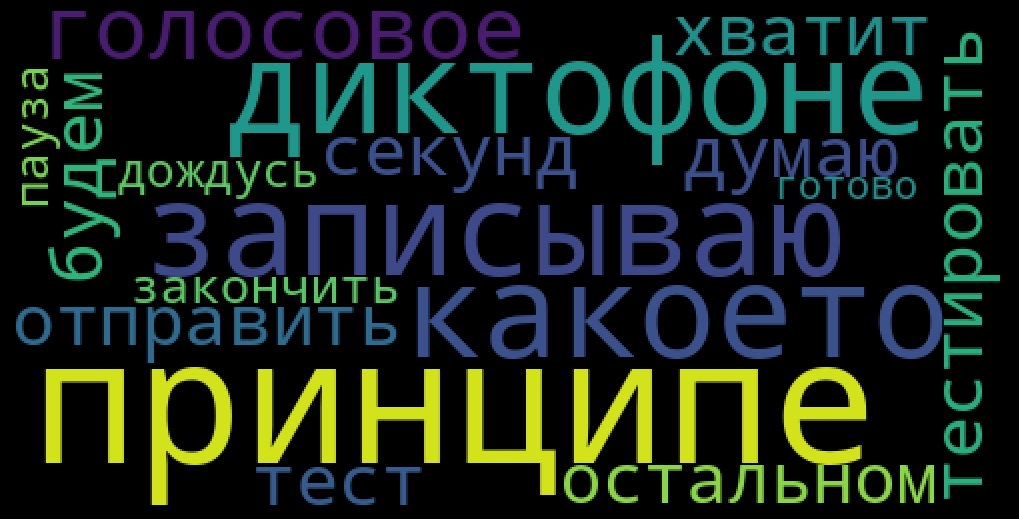

In [ ]:
text_raw = " ".join(text)
wordcloud = WordCloud(width=500, height=250).generate(text_raw)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Long sample

In [ ]:
text_tokens = word_tokenize(transcription_long)
text = nltk.Text(text_tokens)
fdist = FreqDist(text)
fdist

FreqDist({'в': 32, 'я': 27, 'и': 25, 'на': 12, 'это': 12, 'ну': 11, 'так': 10, 'что': 9, 'не': 9, 'с': 8, ...})

In [ ]:
fdist.most_common(5)

[('в', 32), ('я', 27), ('и', 25), ('на', 12), ('это', 12)]

In [ ]:
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text = nltk.Text(text_tokens)
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('это', 12),
 ('июнь', 8),
 ('значит', 7),
 ('год', 4),
 ('чтото', 4),
 ('hee', 4),
 ('общем', 4),
 ('вспомнить', 4),
 ('май', 4),
 ('говорить', 3)]

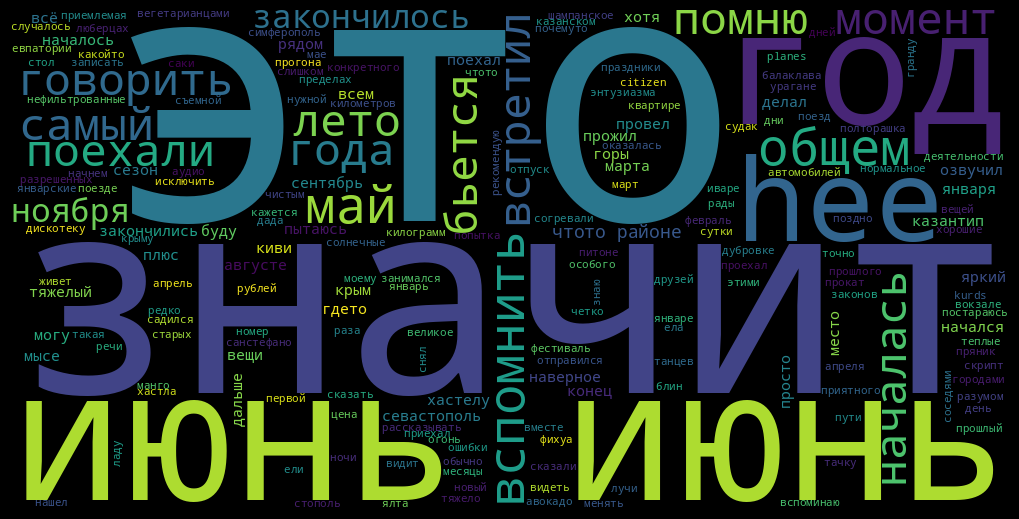

In [ ]:
text_raw = " ".join(text)
wordcloud = WordCloud(width=1000, height=500).generate(text_raw)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Self-made bad words list

In [ ]:
parasites = ["просто", "вот", "ну", "короче", "типа", "пожалуй", "кстати", "вообще", "буквально", "скажем", "блин", "допустим",
             "черт", "вроде", "круто", "прикинь", "прикиньте", "реально", "отпад", "отпадно", "клево", "капец", "норм", "слушай",
             "конечно", "наверное", "вероятно", "кажется"]

In [ ]:
print(len(parasites))
print(len(set(parasites)))

28
28


In [ ]:
text_tokens = word_tokenize(transcription_short)
text_tokens = [token.strip() for token in text_tokens if token in set(parasites)]
text = nltk.Text(text_tokens)
fdist = FreqDist(text)
fdist

FreqDist({})

In [ ]:
text_tokens = word_tokenize(transcription_long)
text_tokens = [token.strip() for token in text_tokens if token in parasites]
text_tokens

['просто',
 'кажется',
 'блин',
 'ну',
 'наверное',
 'ну',
 'просто',
 'ну',
 'вот',
 'вот',
 'ну',
 'ну',
 'наверное']

In [ ]:
text = nltk.Text(text_tokens)
fdist = FreqDist(text)
fdist

FreqDist({'ну': 5, 'просто': 2, 'наверное': 2, 'вот': 2, 'кажется': 1, 'блин': 1})

In [ ]:
find_worst_words(fdist, len(transcription_long))

{'ну': 5}

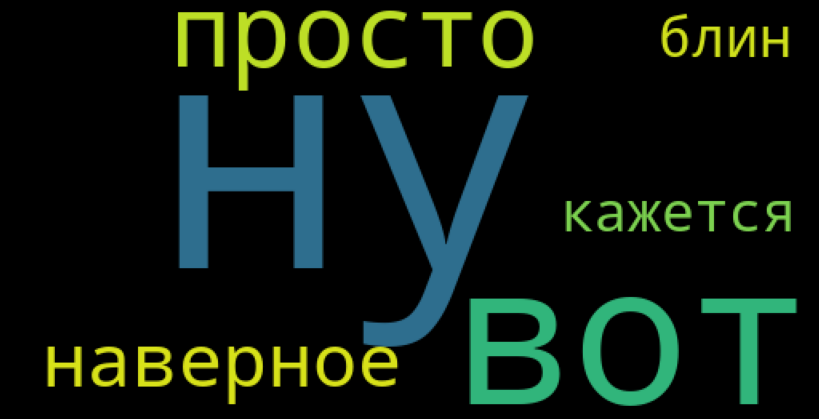

In [ ]:
text_raw = " ".join(text)
wordcloud = WordCloud(width=500, height=250).generate(text_raw)
plt.figure(figsize=(8,5), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()